In [2]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import scipy.stats as stat
import sys

In [397]:
-sys.maxsize > -534653653

False

In [210]:
pd.set_option("display.precision", 5)

In [2]:
y = np.array([6,8,1,0,5,3,2,-4,10,-3,5])
x2 = np.array([8,2,-8,-10,6,-6,0,-12,4,-2,-4])
x1 = np.array([1,4,9,11,3,8,5,10,2,7,6])


In [3]:
df = pd.DataFrame(np.transpose([x1,x2,y]),
         columns=["x1","x2","y"])
df

,x1,x2,y
0,1,8,6
1,4,2,8
2,9,-8,1
3,11,-10,0
4,3,6,5
5,8,-6,3
6,5,0,2
7,10,-12,-4
8,2,4,10
9,7,-2,-3


In [4]:
n = df.shape[0]
n

11

In [5]:
k =  df.shape[1]
k

3

In [6]:
Y = df["y"]
Y

0      6
1      8
2      1
3      0
4      5
5      3
6      2
7     -4
8     10
9     -3
10     5
Name: y, dtype: int32

In [7]:
X = df[["x1","x2"]]
X.insert(0,"cons",np.ones((11,1),dtype=int))

In [8]:
X

,cons,x1,x2
0,1,1,8
1,1,4,2
2,1,9,-8
3,1,11,-10
4,1,3,6
5,1,8,-6
6,1,5,0
7,1,10,-12
8,1,2,4
9,1,7,-2


# Find the beta vector

$$\beta = (X^\intercal X)^{-1} X^\intercal Y$$

In [9]:
X_transpose = X.transpose()
X_transpose

,0,1,2,3,4,5,6,7,8,9,10
cons,1,1,1,1,1,1,1,1,1,1,1
x1,1,4,9,11,3,8,5,10,2,7,6
x2,8,2,-8,-10,6,-6,0,-12,4,-2,-4


In [10]:
X_transpose_dot_X =  X_transpose.dot(X)
X_transpose_dot_X

,cons,x1,x2
cons,11,66,-22
x1,66,506,-346
x2,-22,-346,484


In [11]:
X_transpose_dot_Y = X_transpose.dot(Y)
X_transpose_dot_Y

cons     33
x1       85
x2      142
dtype: int32

In [12]:
beta = np.linalg.inv(X_transpose_dot_X).dot(X_transpose_dot_Y)
beta

array([14. , -2. , -0.5])

In [13]:
print(f"Your fitted equation is Y_hat  = {beta[0]:.0f} + {beta[1]:.0f} X1 + {beta[2]:.1f} X2 ")

Your fitted equation is Y_hat  = 14 + -2 X1 + -0.5 X2 


# Test for significance

## Write out the anova table 

In [14]:
df = df.assign(y_hat = lambda x : (14 - (2 * x.x1) - (0.5 * x.x2)),
         e = lambda x : x.y - x.y_hat
         )

In [15]:
df

,x1,x2,y,y_hat,e
0,1,8,6,8.0,-2.0
1,4,2,8,5.0,3.0
2,9,-8,1,0.0,1.0
3,11,-10,0,-3.0,3.0
4,3,6,5,5.0,0.0
5,8,-6,3,1.0,2.0
6,5,0,2,4.0,-2.0
7,10,-12,-4,0.0,-4.0
8,2,4,10,8.0,2.0
9,7,-2,-3,1.0,-4.0


For sum of residual 

$$SS_{res} = \sum_{i=0}^{n} e_i$$

In [16]:
ss_residual  = (df.e **2).sum()
ss_residual

68.0

For Sum of square of regression is 

$$SS_{reg} =  \beta^\intercal X^\intercal Y - n \bar{Y}^2$$

In [17]:
ss_regression = beta.dot(X_transpose_dot_Y) - (n * (Y.mean() **2))
ss_regression

122.00000000000031

For the Sum of square of total 

$$SS_{tot} = \sum_{i=0}^{n} y_i^2 - n \bar{Y}^2$$

In [18]:
ss_total = (y**2).sum() - (n * (Y.mean() **2))
ss_total

190.0

In [19]:
dof_regression = k -1
dof_regression

2

In [20]:
dof_residual = n-k
dof_residual

8

In [21]:
dof_total = n-1
dof_total

10

In [22]:
mean_residual = ss_residual/dof_residual
mean_residual

8.5

In [23]:
mean_regression = round((ss_regression/dof_regression),4)
mean_regression

61.0

In [24]:
f_statistic = round((mean_regression/mean_residual),4)
f_statistic

7.1765

##  Test for siginificance of overall regression model using alpha = 0.05

State the Hypothesis Test :

$$H_0 : \beta_1 = \beta_2 = 0  $$
against
$$H_0 : \beta_j \neq 0  $$

In [25]:
from scipy.stats import f


In [26]:
critical_value = round(f.ppf(1 - 0.05,dof_regression,dof_residual),2)
critical_value

4.46

In [27]:
def hypo(statistic , tabulated):
    if(statistic > tabulated):
        print("Reject the null Hypothesis Test")
    else:
        print("dont reject the null Hypothesis ")

In [28]:
hypo(f_statistic,critical_value)

Reject the null Hypothesis Test


THis tell that in the fitted equation , the one of the regressor variable is linear to the response variable

## Coeffient of Determination 


In [29]:
R_square = ss_regression / ss_total
R_square

0.6421052631578964

## Calculate the variance of beta

$$Var(\beta) = \sigma^2 (X^\intercal X)^{-1}$$

Since the $\sigma^2$ is unknown we will replace with Mean residual

In [30]:
inverse_X_transpose_dot_X  = np.linalg.inv(X_transpose_dot_X)
inverse_X_transpose_dot_X

array([[ 4.37047898, -0.84946237, -0.40860215],
       [-0.84946237,  0.16897081,  0.08218126],
       [-0.40860215,  0.08218126,  0.0422427 ]])

In [31]:
variance_beta = mean_residual * (inverse_X_transpose_dot_X)
variance_beta

array([[37.14907136, -7.22043011, -3.47311828],
       [-7.22043011,  1.43625192,  0.69854071],
       [-3.47311828,  0.69854071,  0.35906298]])

In [32]:
variance_beta_1 = variance_beta[1][1]
variance_beta_1

1.4362519201228805

In [33]:
variance_beta_2 = variance_beta[2][2]
variance_beta_2

0.35906298003072035

## Test on individual Regression Coefficient

**What does the $X_2$ contribute , given that $X_1$ is already in the regrssion model?**

State the Hypothsis Test : 
$$H_0 : \beta_2 = 0 $$
against
$$H_1 : \beta_2 \neq 0 $$

$$ t = \frac{\beta_2}{\sqrt{MS_{res} (X^\intercal X)_{22} } }$$ 

In [34]:
t_statistic = beta[-1] / np.sqrt(variance_beta_2)
t_statistic

-0.834419968895735

In [35]:
import scipy.stats as stat

In [36]:
critical_value =stat.t.ppf(1- 0.05/2 ,dof_residual)
critical_value

2.3060041350333704

In [37]:
hypo(abs(t_statistic),critical_value)

dont reject the null Hypothesis 


This mean X2 does not contribute to regression model in the presence of the X1

**What does the $X_1$ contribute , given that $X_2$ is already in the regrssion model?**

State the Hypothsis Test : 
$$H_0 : \beta_1 = 0 $$
against
$$H_1 : \beta_1 \neq 0 $$

$$ t = \frac{\beta_1}{\sqrt{MS_{res} (X^\intercal X)_{11} } }$$ 

In [38]:
t_statistic = beta[1] / np.sqrt(variance_beta_1)
t_statistic

-1.6688399377914824

In [39]:
critical_value = stat.t.ppf(1 - 0.05/2 ,dof_residual)
critical_value

2.3060041350333704

In [40]:
hypo(abs(t_statistic),critical_value)

dont reject the null Hypothesis 


This mean X1 does not contribute to regression model in the presence of the X2

In the Global test , X1 and X2 both are contribute to the regression model , but the partial test X1 does not contribute to regression model individually and X2 does not contribute to regression model individually.


This implies there exist the multicollinearity in the model

## How usefull is the regression model using X1 alone?


In [41]:
X = X[["cons","x1"]]
X

,cons,x1
0,1,1
1,1,4
2,1,9
3,1,11
4,1,3
5,1,8
6,1,5
7,1,10
8,1,2
9,1,7


In [42]:
Y

0      6
1      8
2      1
3      0
4      5
5      3
6      2
7     -4
8     10
9     -3
10     5
Name: y, dtype: int32

In [43]:
## Find the beta vector 

X_transpose_dot_X = X.transpose().dot(X)
X_transpose_dot_X

,cons,x1
cons,11,66
x1,66,506


In [44]:
X_transpose_dot_Y  = X.transpose().dot(Y)
X_transpose_dot_Y

cons    33
x1      85
dtype: int32

In [45]:
beta = np.linalg.inv(X_transpose_dot_X).dot(X_transpose_dot_Y)
beta

array([ 9.16363636, -1.02727273])

In [46]:
df_x1_alone = pd.concat([X,Y],axis=1)
df_x1_alone

,cons,x1,y
0,1,1,6
1,1,4,8
2,1,9,1
3,1,11,0
4,1,3,5
5,1,8,3
6,1,5,2
7,1,10,-4
8,1,2,10
9,1,7,-3


In [47]:
df_x1_alone = df_x1_alone.assign(y_hat = lambda x : beta[0] + beta[1] * x.x1 ,
                  e = lambda x : x.y - x.y_hat)


In [48]:
df_x1_alone

,cons,x1,y,y_hat,e
0,1,1,6,8.136364,-2.136364
1,1,4,8,5.054545,2.945455
2,1,9,1,-0.081818,1.081818
3,1,11,0,-2.136364,2.136364
4,1,3,5,6.081818,-1.081818
5,1,8,3,0.945455,2.054545
6,1,5,2,4.027273,-2.027273
7,1,10,-4,-1.109091,-2.890909
8,1,2,10,7.109091,2.890909
9,1,7,-3,1.972727,-4.972727


In [49]:
ss_residual = (df_x1_alone.e ** 2).sum()
ss_residual

73.91818181818181

In [50]:
ss_regression = ((df_x1_alone.y_hat - df_x1_alone.y.mean())**2).sum()
ss_regression

116.08181818181798

In [51]:
ss_total = ss_regression +ss_residual
ss_total

189.99999999999977

In [52]:
dof_regression   = 1
dof_residual = 9
dof_total = 10 

In [53]:
mean_regression = ss_regression/dof_regression
mean_regression

116.08181818181798

In [54]:
mean_residual = ss_residual /dof_residual
mean_residual

8.213131313131312

In [55]:
f_statistic = mean_regression/mean_residual
f_statistic

14.133685893494013

In [56]:
critical_value = stat.f.ppf(1-0.05,dof_regression,dof_residual)
critical_value

5.117355029199227

In [57]:
hypo(f_statistic,critical_value)

Reject the null Hypothesis Test


# Example of Soft Drinker

A soft drink bottler is analyzing the vending machine service routes in his distribution system. He is interested in predicting the amount of time required by the route driver to service the vending machines in an outlet. This service activity includes stocking the machine with beverage products and minor maintenance or housekeeping. The industrial engineer responsible for the study has suggested that the two most important variables affecting the delivery time ( y ) are the number of cases of product stocked ( x1 ) and the distance walked by the route driver ( x2 ). The engineer has collected 25 observations on delivery time, which are shown in Table 3.2 .(Note that this is an expansion of the data set used in Example 2.9.) We will fi t the multiple linear regression model

In [58]:
soft_drink = pd.read_excel("data/soft_drink.xlsx",
                          header=None,
                          names=["Delivery Time","NUmber of Cases","Distance"])
soft_drink

,Delivery Time,NUmber of Cases,Distance
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150
5,18.11,7,330
6,8.00,2,110
7,17.83,7,210
8,79.24,30,1460
9,21.50,5,605


In [59]:
Y = soft_drink["Delivery Time"]
Y

0     16.68
1     11.50
2     12.03
3     14.88
4     13.75
5     18.11
6      8.00
7     17.83
8     79.24
9     21.50
10    40.33
11    21.00
12    13.50
13    19.75
14    24.00
15    29.00
16    15.35
17    19.00
18     9.50
19    35.10
20    17.90
21    52.32
22    18.75
23    19.83
24    10.75
Name: Delivery Time, dtype: float64

In [60]:
X = soft_drink[["NUmber of Cases" ,"Distance"]]
X

,NUmber of Cases,Distance
0,7,560
1,3,220
2,3,340
3,4,80
4,6,150
5,7,330
6,2,110
7,7,210
8,30,1460
9,5,605


In [61]:
X.insert(0,"const",np.ones_like(X["NUmber of Cases"]))
X

,const,NUmber of Cases,Distance
0,1,7,560
1,1,3,220
2,1,3,340
3,1,4,80
4,1,6,150
5,1,7,330
6,1,2,110
7,1,7,210
8,1,30,1460
9,1,5,605


In [62]:
n = X.shape[0]
n

25

In [63]:
k = X.shape[1]
k

3

In [64]:
X_transpose_dot_X  =X.transpose().dot(X)
X_transpose_dot_X

,const,NUmber of Cases,Distance
const,25,219,10232
NUmber of Cases,219,3055,133899
Distance,10232,133899,6725688


In [65]:
X_transpose_dot_Y =X.transpose().dot(Y)
X_transpose_dot_Y

const                 559.60
NUmber of Cases      7375.44
Distance           337071.69
dtype: float64

In [66]:
beta = np.linalg.inv(X_transpose_dot_X).dot(X_transpose_dot_Y)
beta

array([2.34123115, 1.61590721, 0.01438483])

## Estimate the error variance

We now estimate the error variance σ2 for the multiple regression model fit to the soft drink delivery time data

In [67]:
soft_drink = soft_drink.assign(y_hat=lambda x: beta[0] + (beta[1] * x["NUmber of Cases"]) +
                  (beta[2] * x["Distance"]),
                 e = lambda x : x["Delivery Time"] - x.y_hat)
soft_drink.head()

,Delivery Time,NUmber of Cases,Distance,y_hat,e
0,16.68,7,560,21.708084,-5.028084
1,11.50,3,220,10.353615,1.146385
2,12.03,3,340,12.079794,-0.049794
3,14.88,4,80,9.955646,4.924354
4,13.75,6,150,14.194398,-0.444398


In [68]:
y_hat = soft_drink.y_hat
y_hat.head()

0    21.708084
1    10.353615
2    12.079794
3     9.955646
4    14.194398
Name: y_hat, dtype: float64

In [69]:
residual = soft_drink.e
residual.head()

0   -5.028084
1    1.146385
2   -0.049794
3    4.924354
4   -0.444398
Name: e, dtype: float64

In [70]:
ss_residual = (residual**2).sum()
ss_residual

233.73167742055278

In [71]:
dof_residual = n - k
dof_residual

22

In [72]:
mean_residual = ss_residual /dof_residual
mean_residual

10.624167155479672

## Test for siginificance (Overall adequacy of model)

We now test for signifi cance of regression using the delivery time data from Example 

In [73]:
ss_total  = ((Y - Y.mean())**2).sum()
ss_total

5784.5426

In [74]:
ss_regression = ((y_hat - Y.mean())**2).sum()
ss_regression

5550.810922579395

In [75]:
dof_regression = k -1
dof_regression

2

In [76]:
mean_regression = ss_regression /dof_regression
mean_regression

2775.4054612896975

In [77]:
f_statistic = mean_regression/mean_residual
f_statistic

261.2351086605612

In [78]:
critical_value = stat.f.ppf(1-0.05,dof_regression,dof_residual)
critical_value

3.4433567793667237

In [79]:
f_value = stat.f.sf(f_statistic,dof_regression,dof_residual)
f_value

4.687422207750206e-16

Since the  f_statistic >  critical_value , we reject the null hypothesis, and we conclude that the delivery time is related to the volume and/or distance. 

However, this doesnt necessary imply that the relationship found is appropiate one for predicting delivery time as the function of the volumne and distance.

this aslo conclude using the f_value 

## Co efficient of determination 

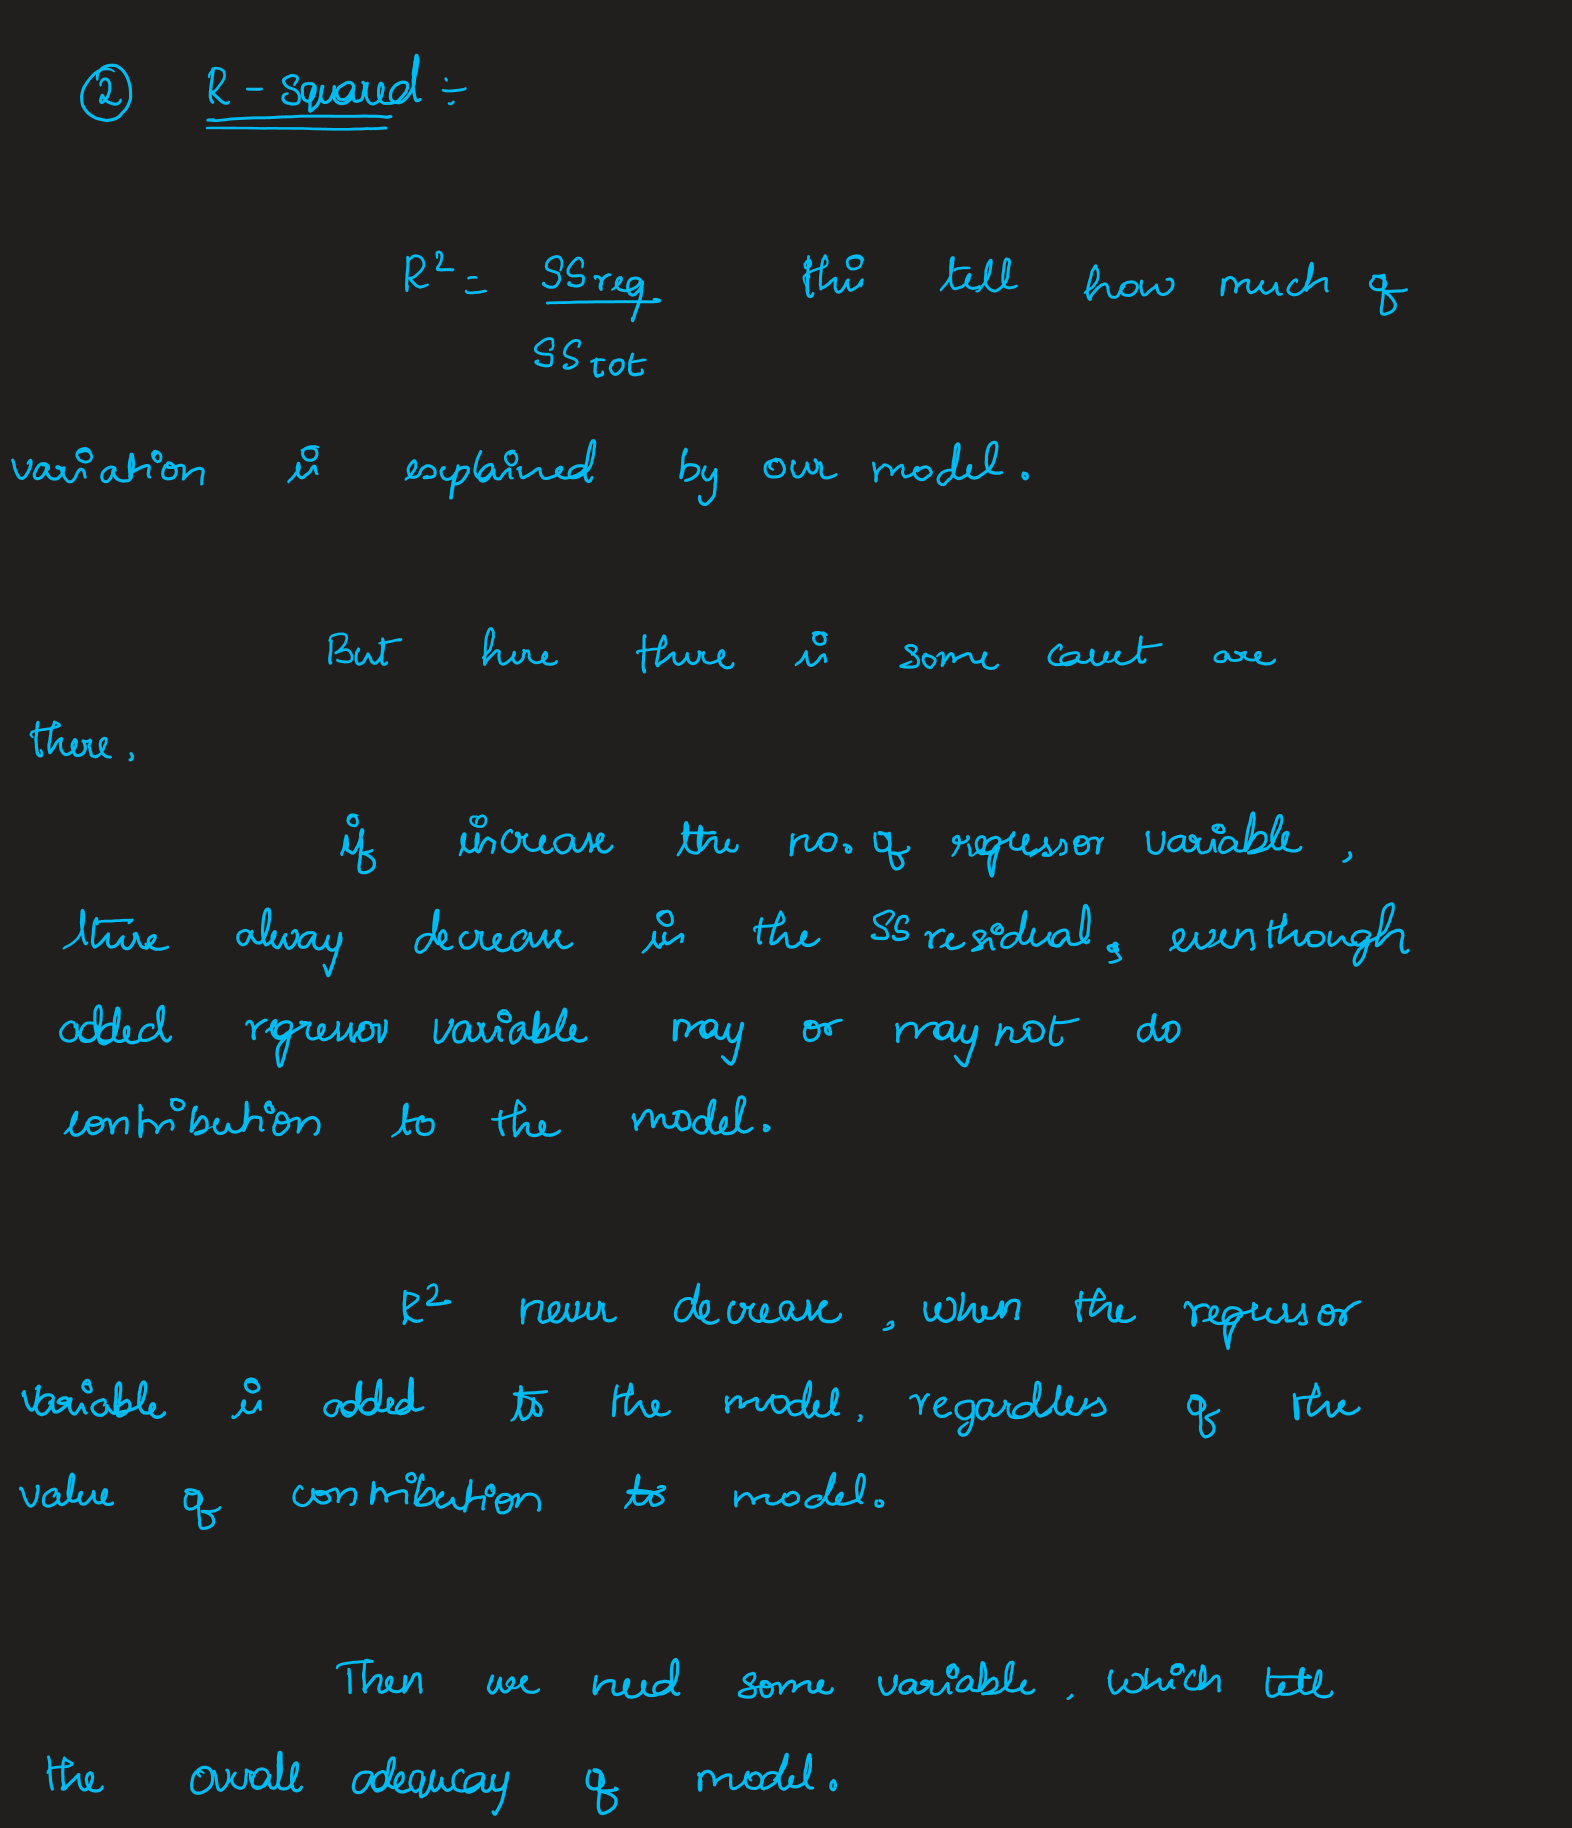

In [80]:
R_square = ss_regression/ss_total
R_square

0.9595937494832167

In [81]:
dof_total = n - 1
mean_total = ss_total/dof_total
mean_total

241.02260833333332

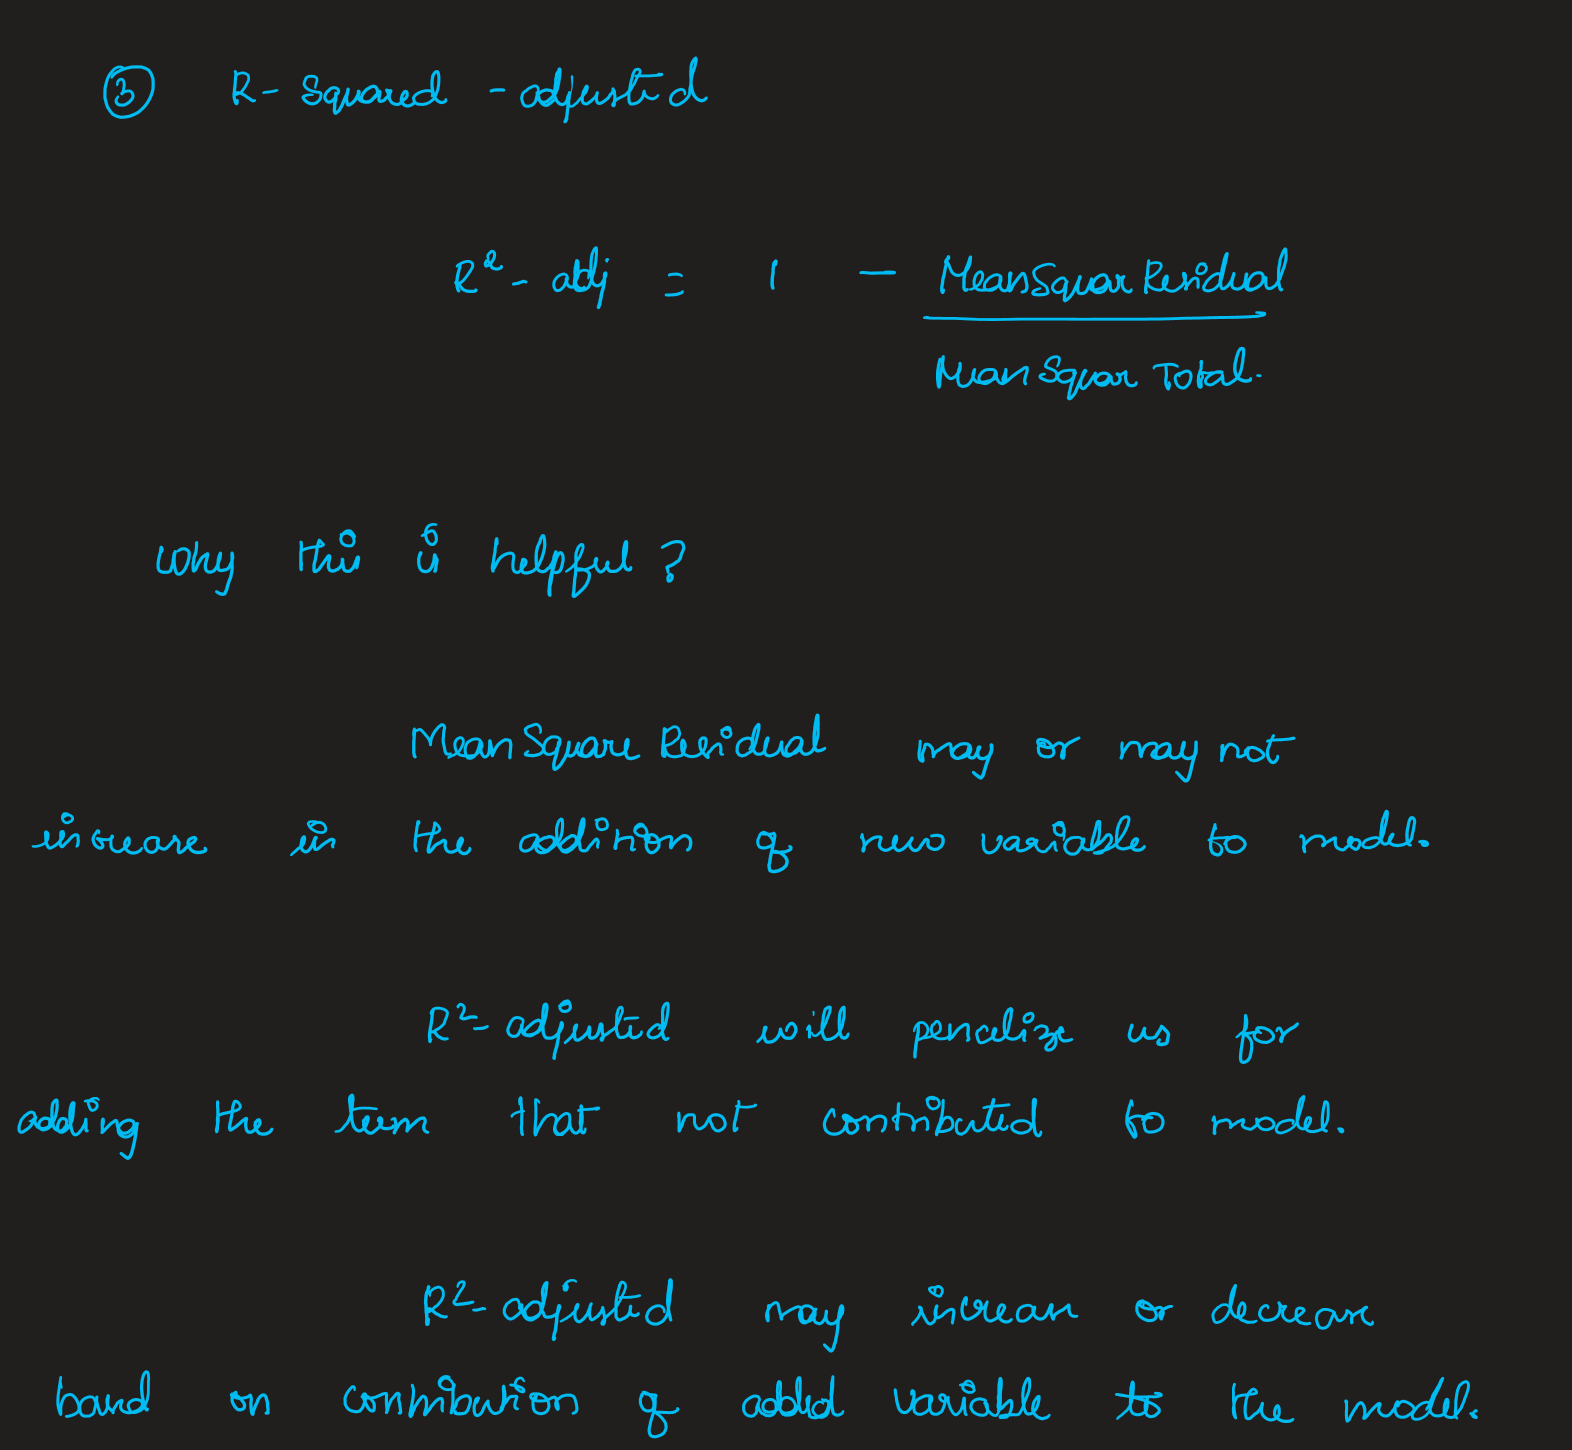

In [82]:
R_square_adj =  1 - (mean_residual/mean_total)
R_square_adj

0.9559204539817008

## test for individual regression coefficient


Finding the contribution of $x_j$ given that other regressor in model.

we wish to assess the value of the regressor variable x2 (distance) given that the regressor x1 (cases) is in the model.


$$H_0 : \beta_2 = 0 $$
against 
$$H_1 : \beta_2 \neq 0$$

Null Hypo if true indicated that the regressor $x_2$ can be delete.

In [87]:
covarivance_matrix_beta =  np.linalg.inv(X_transpose_dot_X)
covarivance_matrix_beta

array([[ 1.13215186e-01, -4.44859324e-03, -8.36725698e-05],
       [-4.44859324e-03,  2.74378329e-03, -4.78570866e-05],
       [-8.36725698e-05, -4.78570866e-05,  1.22874474e-06]])

In [88]:
# Standarized the beta_2
t_statistic = beta[2] / np.sqrt(mean_residual * covarivance_matrix_beta[2][2])
t_statistic

3.98131313674307

In [91]:
# beta follow the t distribution with n-k dof freedom
critical_value = stat.t.ppf(1-0.05/2 , dof_residual)
critical_value

2.0738730679040147

In [90]:
p_value = stat.t.sf(t_statistic,dof_residual)
p_value

0.00031562343112142606

since the t_statistic > critical_value and the p_vlaue is smaller that alpha ,,

So we reject the null hypothesis that is $H_0 : \beta_2 = 0 $

<span class="mark">This test indicate that the distance(regressor x_2) contribute significantly to the model given the x_1 is also in the model</span> . 

## Extra sum of square 

The above can be done using the extra sum of sqaure 

After fiiting the model with all regressor (full model) we belive some subset of the regessor doesnt contribute to the model . 

In this example we say $x_2$  doesnt not contribute 

So the Hypo test defined as 

$$H_0 : \beta_2 = 0 $$
against 
$$H_1 : \beta_2 \neq 0 $$


Consider the null hypothesis is true then our model will become $$y = \beta_0 +\beta_1 x_1 +\epsilon$$

we need to fit for the resitricted model .

In [95]:
X_rest = X.iloc[:,0:2]
X_rest.head()

,const,NUmber of Cases
0,1,7
1,1,3
2,1,3
3,1,4
4,1,6


In [96]:
X_transpose_dot_X_rest = X_rest.transpose().dot(X_rest)
X_transpose_dot_X_rest.head()

,const,NUmber of Cases
const,25,219
NUmber of Cases,219,3055


In [97]:
X_transpose_dot_Y_rest = X_rest.transpose().dot(Y)
X_transpose_dot_Y_rest

const               559.60
NUmber of Cases    7375.44
dtype: float64

In [98]:
beta_rest = np.linalg.inv(X_transpose_dot_X_rest).dot(X_transpose_dot_Y_rest)
beta_rest

array([3.3207799 , 2.17616668])

In [99]:
print(f"We fitted the model Y = {beta_rest[0]} + {beta_rest[1]} X1")

We fitted the model Y = 3.32077989723377 + 2.1761666783979727 X1


In [102]:
soft_drink_rest  = pd.concat([X_rest,Y],axis=1)
soft_drink_rest.head()

,const,NUmber of Cases,Delivery Time
0,1,7,16.68
1,1,3,11.50
2,1,3,12.03
3,1,4,14.88
4,1,6,13.75


In [106]:
soft_drink_rest = soft_drink_rest.assign(y_hat = lambda x : beta_rest[0] + beta_rest[1] * x["NUmber of Cases"],
                      e = lambda x : x["Delivery Time"] - x.y_hat)
soft_drink_rest.head()

,const,NUmber of Cases,Delivery Time,y_hat,e
0,1,7,16.68,18.553947,-1.873947
1,1,3,11.50,9.849280,1.650720
2,1,3,12.03,9.849280,2.180720
3,1,4,14.88,12.025447,2.854553
4,1,6,13.75,16.377780,-2.627780


In [110]:
ss_regression_rest = ((soft_drink_rest["y_hat"] - soft_drink_rest["Delivery Time"].mean())**2).sum()
ss_regression_rest

5382.408797015553

In [111]:
k_rest = X_rest.shape[1]
k_rest

2

In [112]:
ss_regression_extra = ss_regression -ss_regression_rest
ss_regression_extra

168.40212556384176

In [113]:
dof_regression_rest = k_rest-1
dof_regression_rest

1

In [115]:
f_statistic = (ss_regression_extra /dof_regression_rest)/(mean_residual)
f_statistic

15.85085429279831

Note we are diving byt the total mean residual

In [117]:
critical_value = stat.f.ppf(1-0.05 , dof_regression_rest,dof_residual)
critical_value

4.300949501777657

In [118]:
p_value = stat.f.sf(f_statistic,dof_regression_rest,dof_residual)
p_value

0.0006312468622437467

Since the f_statisctis > f_critical we are rejecting the null hypothesis in favor of alternate hypothesis.

this mean distance(regrssor x2) contribute  siginificantly to the model .

## Confidence interval on regression co-effiecient

1. Find the Critical value
2. estimator for that paramater $\pm$ critical Value * std of the estimator

In [125]:
critical_value = stat.t.ppf(1 - 0.05/2 ,dof_residual)
critical_value

2.0738730679040147

In [119]:
std_beta_1 = np.sqrt(mean_residual * covarivance_matrix_beta[1][1])
std_beta_1

0.1707349182810887

In [130]:
print(f"95% CI on B1 is {beta[1] - critical_value * std_beta_1} <= B1 <= {beta[1] + critical_value * std_beta_1}")

95% CI on B1 is 1.261824661835301 <= B1 <= 1.9699897593831865


## Confident interval on mean response


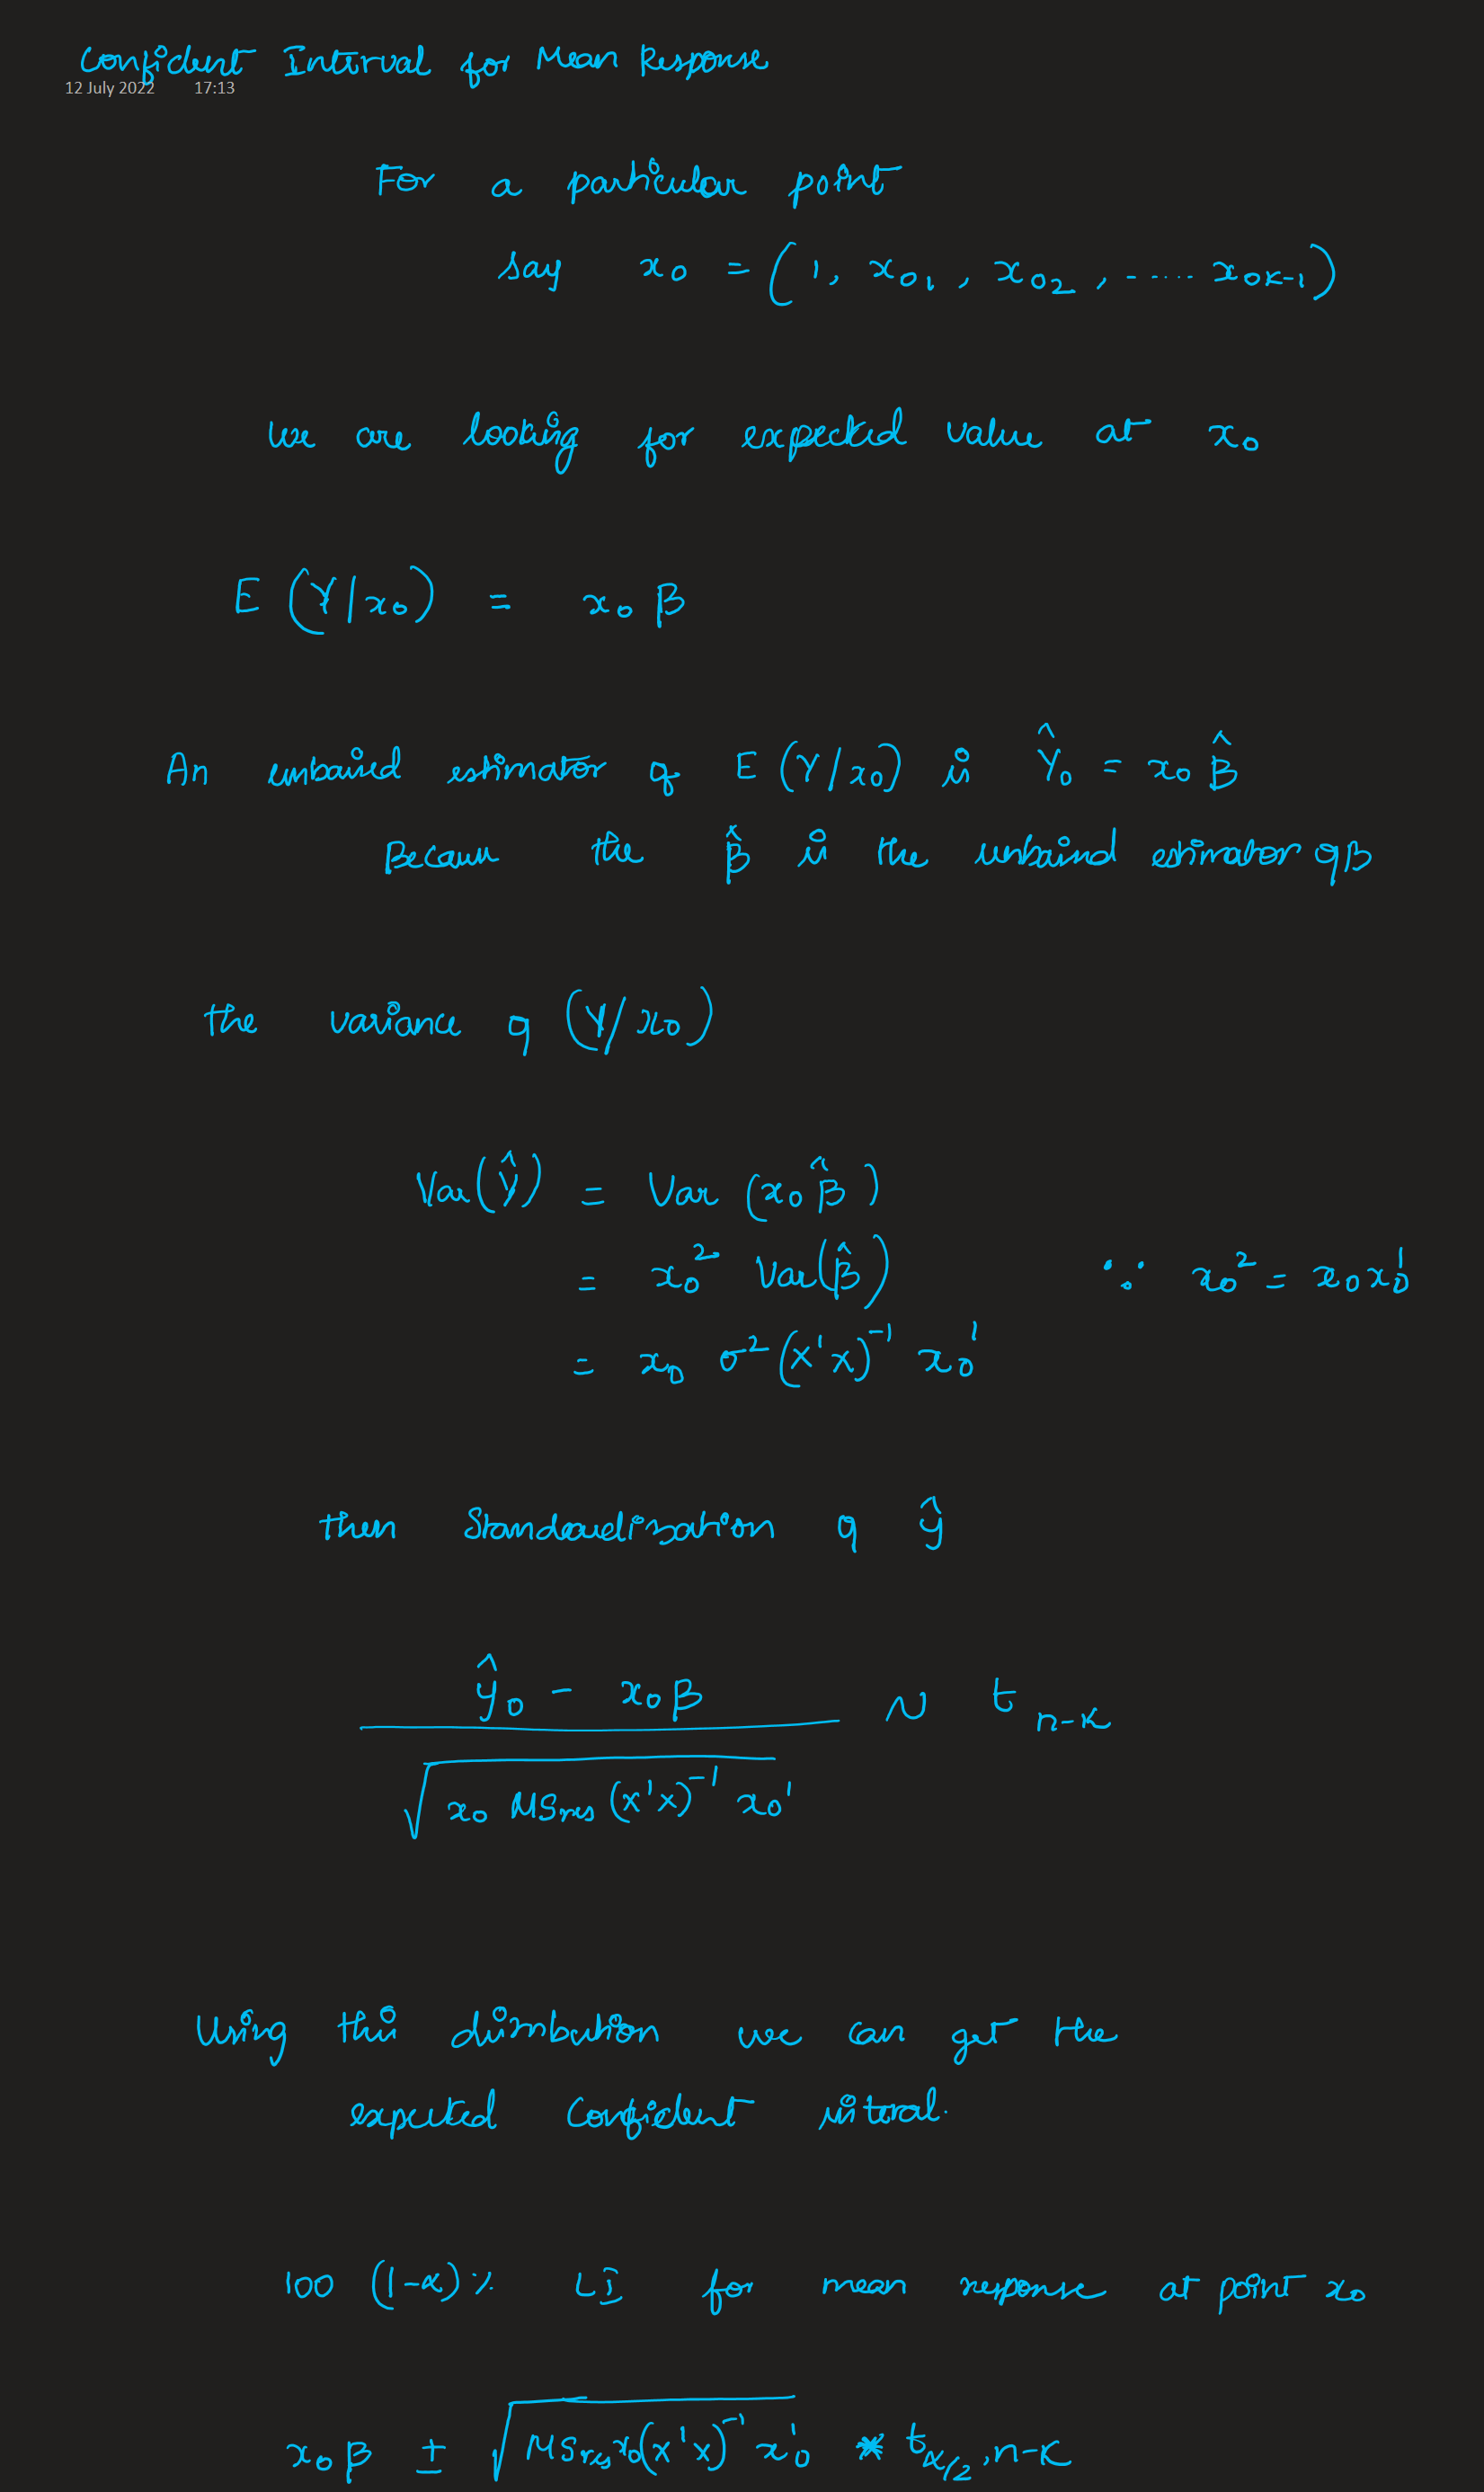

The soft drink bottler in Example 3.1 would like to construct a 95% CI on the mean delivery time for an outlet requiring x1 = 8 cases and where the distance x2 = 275 feet.

The fitted value at $x_0$ is
$$\hat{y} = x_0 \hat{\beta}$$

the Excepted value of the fitted values is

$$E[\hat{y}] = x_0 \beta $$

Since $\hat{\beta }$  is unbiased estimator of $\beta$

In [132]:
x_0 = np.array([1,8,275])
x_0

array([  1,   8, 275])

In [133]:
expected_fitted_value = x_0.dot(beta)
expected_fitted_value

19.22431605034197

The variance of the fitted value is
$$Var(x_0 \beta) = x_0^\intercal  Var(\beta)   x_0$$
$$Var(\beta) = \sigma^2 (X^\intercal X)^{-1}$$

In [134]:
var_fiited_value = x_0.transpose().dot(var_beta).dot(x_0)
var_fiited_value

0.5734134120661571

In [135]:
print(f"95% CI on E[y|x0] is {expected_fitted_value - critical_value * np.sqrt(var_fiited_value)} <= E[y|x0] <= {expected_fitted_value + critical_value * np.sqrt(var_fiited_value)}")

95% CI on E[y|x0] is 17.653895046617638 <= E[y|x0] <= 20.7947370540663


# Model Selection

## All possible Regression

In [178]:
hald_cement = pd.read_excel("data/Hald cement data.xlsx",
                           header=None,
                           names=["y","x1","x2","x3","x4"],
                           index_col=0)
hald_cement.reset_index(drop=True,inplace=True)

In [179]:
hald_cement.head()

,y,x1,x2,x3,x4
0,78.5,7,26,6,60
1,74.3,1,29,15,52
2,104.3,11,56,8,20
3,87.6,11,31,8,47
4,95.9,7,52,6,33


In [139]:
import itertools as itr

In [180]:
intercept = pd.Series(np.ones_like(hald_cement.x1))

In [181]:
intercept 

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
dtype: int64

In [182]:
X = hald_cement.iloc[:,1:]
X

,x1,x2,x3,x4
0,7,26,6,60
1,1,29,15,52
2,11,56,8,20
3,11,31,8,47
4,7,52,6,33
5,11,55,9,22
6,3,71,17,6
7,1,31,22,44
8,2,54,18,22
9,21,47,4,26


In [183]:
Y = hald_cement.y
Y.head()

0     78.5
1     74.3
2    104.3
3     87.6
4     95.9
Name: y, dtype: float64

In [184]:
def calculate_beta(X , Y):
    X_transpose_dot_X = X.transpose().dot(X)
    X_transpose_dot_Y = X.transpose().dot(Y)
    return np.linalg.inv(X_transpose_dot_X).dot(X_transpose_dot_Y)
    

In [198]:
possilbe = {}

In [225]:
for no_reg in range(5):
    for comb in itr.combinations(X.columns,no_reg):
        internal_X = X.loc[:,comb]
        X_with_intercept = pd.concat([intercept,internal_X],axis=1)
        n = X_with_intercept.shape[0]
        k = X_with_intercept.shape[1]
        beta = calculate_beta(X_with_intercept,Y)
        X_with_intercept = X_with_intercept.assign(y_hat = lambda x: x.dot(beta),
                               e = lambda x : Y - x.y_hat )
        ss_residual = ((X_with_intercept.e)**2).sum()
        dof_residual = n - k
        ss_regression = ((X_with_intercept.y_hat - Y.mean())**2).sum()
        dof_regression = k - 1
        ss_total = ((Y -Y.mean())**2).sum()
        dof_total = n -1
        mean_regression = ss_regression /dof_regression
        mean_residual = ss_residual / dof_residual
        mean_total = ss_total / dof_total
        paramter = {}
        paramter["R squared"] = ss_regression /ss_total
        paramter["R squared adjusted"] = 1 - (mean_residual/mean_total)
        paramter["Mean residual"] = mean_residual
        paramter["k"] = no_reg
        paramter["beta"] = list(map(round,beta,(np.ones_like(beta,dtype=int)*3)))
        possilbe[comb] = paramter
        
        
        
        

    

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_70928\3160760366.py:16: RuntimeWarning: invalid value encountered in double_scalars
  mean_regression = ss_regression /dof_regression


In [227]:
all_possiblity = pd.DataFrame(possilbe).transpose()
all_possiblity

R squared R squared adjusted Mean residual  k  \
NaN NaN NaN NaN       0.0                0.0     226.31359  0   
x1  NaN NaN NaN   0.53395            0.49158     115.06243  1   
x2  NaN NaN NaN   0.66627            0.63593      82.39421  1   
x3  NaN NaN NaN   0.28587            0.22095     176.30913  1   
x4  NaN NaN NaN   0.67454            0.64495      80.35154  1   
x1  x2  NaN NaN   0.97868            0.97441       5.79045  2   
    x3  NaN NaN   0.54817             0.4578     122.70721  2   
    x4  NaN NaN   0.97247            0.96697       7.47621  2   
x2  x3  NaN NaN   0.84703            0.81643      41.54427  2   
    x4  NaN NaN   0.68006            0.61607      86.88801  2   
x3  x4  NaN NaN   0.93529            0.92235       17.5738  2   
x1  x2  x3  NaN   0.98228            0.97638       5.34562  3   
        x4  NaN   0.98234            0.97645        5.3303  3   
    x3  x4  NaN   0.98128            0.97504       5.64846  3   
x2  x3  x4  NaN   0.97282            0.96376       8.20162  3   
x1  x2  x3  x4    0.98238            0.97356       5.98295  4   

                                                 beta  
NaN NaN NaN NaN                              [95.423]  
x1  NaN NaN NaN                       [81.479, 1.869]  
x2  NaN NaN NaN                       [57.424, 0.789]  
x3  NaN NaN NaN                     [110.203, -1.256]  
x4  NaN NaN NaN                     [117.568, -0.738]  
x1  x2  NaN NaN                [52.577, 1.468, 0.662]  
    x3  NaN NaN                [72.349, 2.312, 0.494]  
    x4  NaN NaN               [103.097, 1.44, -0.614]  
x2  x3  NaN NaN               [72.075, 0.731, -1.008]  
    x4  NaN NaN                [94.16, 0.311, -0.457]  
x3  x4  NaN NaN               [131.282, -1.2, -0.725]  
x1  x2  x3  NaN          [48.194, 1.696, 0.657, 0.25]  
        x4  NaN        [71.648, 1.452, 0.416, -0.237]  
    x3  x4  NaN       [111.684, 1.052, -0.41, -0.643]  
x2  x3  x4  NaN     [203.642, -0.923, -1.448, -1.557]  
x1  x2  x3  x4   [62.405, 1.551, 0.51, 0.102, -0.144]

In [235]:
all_possiblity.sort_index(inplace=True)

In [238]:
all_possiblity.loc["x3",:]

,,,R squared,R squared adjusted,Mean residual,k,beta
x4,NaN,NaN,0.93529,0.92235,17.5738,2,"[131.282, -1.2, -0.725]"
NaN,NaN,NaN,0.28587,0.22095,176.30913,1,"[110.203, -1.256]"


In [243]:
all_possiblity.index.set_names(["1","2","3","4"],
                              inplace=True)

In [244]:
all_possiblity

R squared R squared adjusted Mean residual  k  \
1   2   3   4                                                   
x1  x2  x3  x4    0.98238            0.97356       5.98295  4   
            NaN   0.98228            0.97638       5.34562  3   
        x4  NaN   0.98234            0.97645        5.3303  3   
        NaN NaN   0.97868            0.97441       5.79045  2   
    x3  x4  NaN   0.98128            0.97504       5.64846  3   
        NaN NaN   0.54817             0.4578     122.70721  2   
    x4  NaN NaN   0.97247            0.96697       7.47621  2   
    NaN NaN NaN   0.53395            0.49158     115.06243  1   
x2  x3  x4  NaN   0.97282            0.96376       8.20162  3   
        NaN NaN   0.84703            0.81643      41.54427  2   
    x4  NaN NaN   0.68006            0.61607      86.88801  2   
    NaN NaN NaN   0.66627            0.63593      82.39421  1   
x3  x4  NaN NaN   0.93529            0.92235       17.5738  2   
    NaN NaN NaN   0.28587            0.22095     176.30913  1   
x4  NaN NaN NaN   0.67454            0.64495      80.35154  1   
NaN NaN NaN NaN       0.0                0.0     226.31359  0   

                                                 beta  
1   2   3   4                                          
x1  x2  x3  x4   [62.405, 1.551, 0.51, 0.102, -0.144]  
            NaN          [48.194, 1.696, 0.657, 0.25]  
        x4  NaN        [71.648, 1.452, 0.416, -0.237]  
        NaN NaN                [52.577, 1.468, 0.662]  
    x3  x4  NaN       [111.684, 1.052, -0.41, -0.643]  
        NaN NaN                [72.349, 2.312, 0.494]  
    x4  NaN NaN               [103.097, 1.44, -0.614]  
    NaN NaN NaN                       [81.479, 1.869]  
x2  x3  x4  NaN     [203.642, -0.923, -1.448, -1.557]  
        NaN NaN               [72.075, 0.731, -1.008]  
    x4  NaN NaN                [94.16, 0.311, -0.457]  
    NaN NaN NaN                       [57.424, 0.789]  
x3  x4  NaN NaN               [131.282, -1.2, -0.725]  
    NaN NaN NaN                     [110.203, -1.256]  
x4  NaN NaN NaN                     [117.568, -0.738]  
NaN NaN NaN NaN                              [95.423]

## Wrappper Method

### Forward Selection :


In [254]:
X.head()

,x1,x2,x3,x4
0,7,26,6,60
1,1,29,15,52
2,11,56,8,20
3,11,31,8,47
4,7,52,6,33


In [255]:
Y.head()

0     78.5
1     74.3
2    104.3
3     87.6
4     95.9
Name: y, dtype: float64


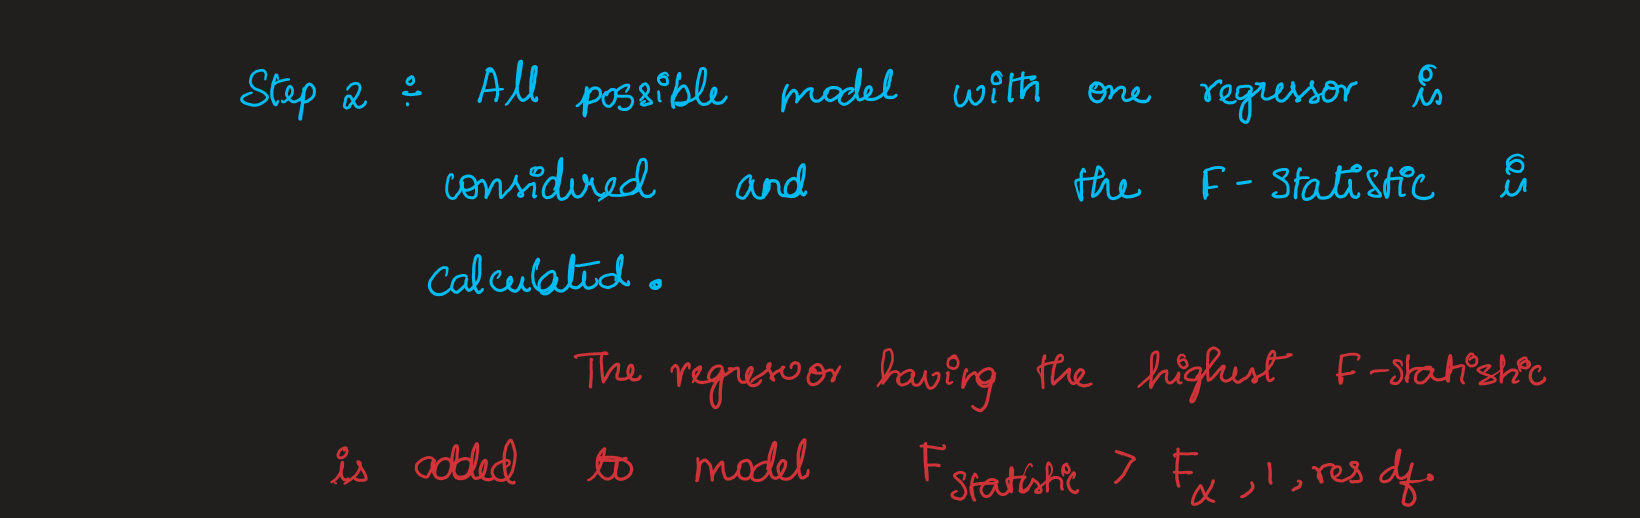

In [261]:
x1_with_intercept = sm.add_constant(X.x1)
lr_x1 = sm.OLS(Y,x1_with_intercept).fit()
F_x1 = lr_x1.fvalue
F_x1

12.602517664481203

In [262]:
x2_with_intercept = sm.add_constant(X.x2)
lr_x2 = sm.OLS(Y,x2_with_intercept).fit()
F_x2 = lr_x2.fvalue
F_x2

21.960604592155207

In [263]:
x3_with_intercept = sm.add_constant(X.x3)
lr_x3 = sm.OLS(Y,x3_with_intercept).fit()
F_x3 = lr_x3.fvalue
F_x3

4.403416843251625

In [264]:
x4_with_intercept = sm.add_constant(X.x4)
lr_x4 = sm.OLS(Y,x4_with_intercept).fit()
F_x4 = lr_x4.fvalue
F_x4

22.798520201382274

In [385]:
regressor = {}
for col in X:
    internal = {}
    x_with_intercept = sm.add_constant(X[col])
    lr = sm.OLS(Y,x_with_intercept).fit()
    regressor[col] = lr

In [389]:
regressor.items()

dict_values([<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001869A71D040>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001869A71DA30>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001869AC755B0>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001869AC758E0>])

In [372]:
max_f = possible_model.fvalue.idxmax()
max_f

'x4'

In [377]:
selected_regressor = possible_model.loc[max_f]
selected_regressor

fvalue      22.79852
ess       1831.89616
Name: x4, dtype: float64

In [381]:
[(selected_regressor.name)]

['x4']


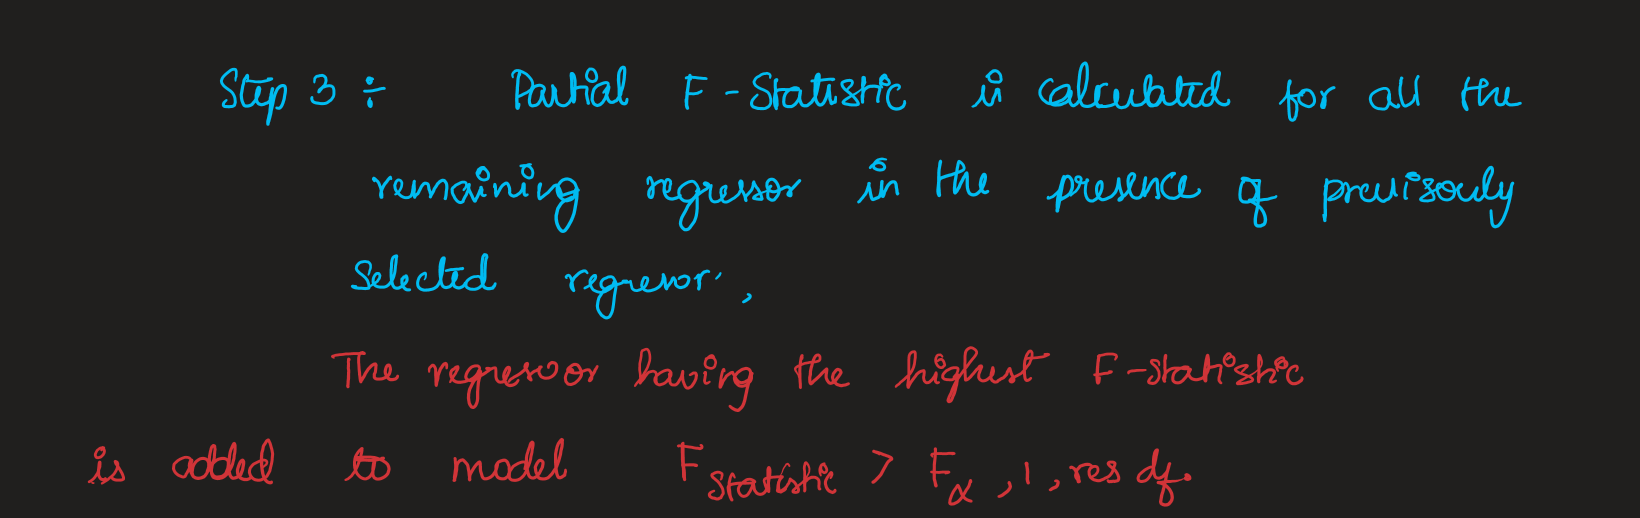

In [383]:
regressor = {}
for col in X:
    if col not in [selected_regressor.name]:
        internal = {}
        x_with_intercept = sm.add_constant(X[col])
        lr = sm.OLS(Y,x_with_intercept).fit()
        internal["fvalue"] = lr.fvalue
        internal["ess"] = lr.ess
        regressor["".join(selected_regressor.name + col)] = internal        
       

In [384]:
regressor


{'x4x1': {'fvalue': 12.602517664481203, 'ess': 1450.0763281272268},
 'x4x2': {'fvalue': 21.960604592155207, 'ess': 1809.426733406373},
 'x4x3': {'fvalue': 4.403416843251625, 'ess': 776.3626081730772}}

In [365]:
fvalue

{'x1': {12.602517664481203, 1450.0763281272268},
 'x2': {21.960604592155207, 1809.426733406373},
 'x3': {4.403416843251625, 776.3626081730772},
 'x4': {22.798520201382274, 1831.8961600237956}}

In [490]:
def fit_model(data,selected_regressor):
    model= {}
    for col in data:
        if col not in selected_regressor:            
            data_with_intercept = sm.add_constant(data[selected_regressor+[col]])
            lr = sm.OLS(Y,data_with_intercept).fit()
            model[col] = lr
    return model 

In [509]:
def find_max_fvalue(models):
    maxs = -sys.maxsize 
    max_model = ""
    regressor = ""
    flag = True
    for key ,model in models.items():
        if maxs  < model.fvalue:
            maxs  = model.fvalue            
            max_model = model
            regressor = key
            flag = maxs > stat.f.ppf(1-0.25,1,max_model.df_resid)
            print(flag)
    return (regressor,max_model,flag)

In [510]:
def find_max_partial_f(models,pre_max_model):
    maxs = -sys.maxsize 
    max_model = ""
    regressor = ""
    for key,model in models.items():
        partial_f = (model.ess - pre_max_model.ess)/model.mse_resid
        if maxs < partial_f:
            maxs = partial_f
            max_model = model
            regressor =key
            flag = maxs > stat.f.ppf(1-0.25,1,max_model.df_resid)
            print(flag)
    return (regressor,max_model,flag)
    

In [511]:
def print_summary(max_model):
    print(max_model.params)
    print(max_model.tvalues)
    print(max_model.pvalues)
    print(max_model.rsquared)
    print(max_model.rsquared_adj)

In [512]:
selected_regressor = []
flag = True
for step in range(X.shape[1]):
    print(step)
    print

    if step == 0:
        models = fit_model(X, selected_regressor)
        regressor, max_model, flag = find_max_fvalue(models)
        if flag != True:
            break
        print(f"{regressor} is added to model")
        selected_regressor.append(regressor)
        print_summary(max_model)
    if step != 0:
        models = fit_model(X, selected_regressor)
        regressor, max_model, flag = find_max_partial_f(models, max_model)
        if flag != True:
            break
        selected_regressor.append(regressor)
        print(f"{regressor} is added to model")
        print_summary(max_model)
    
        

0
True
True
True
x4 is added to model
const    117.56793
x4        -0.73816
dtype: float64
const    22.34195
x4       -4.77478
dtype: float64
const    1.62424e-10
x4       5.76232e-04
dtype: float64
0.6745419641316093
0.6449548699617556
1
True
x1 is added to model
const    103.09738
x4        -0.61395
x1         1.43996
dtype: float64
const    48.53963
x4      -12.62122
x1       10.40307
dtype: float64
const    3.32434e-13
x4       1.81489e-07
x1       1.10528e-06
dtype: float64
0.9724710477169313
0.9669652572603176
2
True
x2 is added to model
const    71.64831
x4       -0.23654
x1        1.45194
x2        0.41611
dtype: float64
const     5.06621
x4       -1.36501
x1       12.40998
x2        2.24184
dtype: float64
const    6.75332e-04
x4       2.05395e-01
x1       5.78076e-07
x2       5.16873e-02
dtype: float64
0.9823354512004266
0.9764472682672355
3
False


In [495]:
selected_regressor

['x4', 'x1']

In [504]:
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [507]:
lr = LinearRegression()
ffs = SequentialFeatureSelector(lr,
                               k_features="best",
                               forward=True,
                               verbose=2,
                               scoring="neg_mean_squared_error")
ffs.fit(X,Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s finished

[2022-07-13 23:45:11] Features: 1/4 -- score: -98.6809819979878[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished

[2022-07-13 23:45:11] Features: 2/4 -- score: -10.757854507472903[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2022-07-13 23:45:11] Features: 3/4 -- score: -6.5574939894647475[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1

SequentialFeatureSelector(estimator=LinearRegression(), k_features='best',
                          scoring='neg_mean_squared_error', verbose=2)

In [508]:
ffs.k_feature_names_

('x1', 'x2', 'x4')

## Backward Selection

In [547]:
def backward_selection(X,Y):
    full_model = list(X.columns)
    while True:
        changed = False

        f_value = pd.Series(dtype=float,index=X.columns)
        lr = sm.OLS(Y,sm.add_constant(X[full_model])).fit()
        ss_res_full = lr.ess
        #print(ss_res_full)

        ms_res_full = lr.mse_resid
        #print(ms_res_full)
        for col in full_model:
            #print(col)

            rest_lr = sm.OLS(Y,sm.add_constant(X[list(set(full_model)-set([col]))])).fit()
            #print(list(set(full_model)-set(col)))
            partial_value = (ss_res_full - rest_lr.ess)/ms_res_full

            f_value[col] = partial_value
        print(f_value)
        min_partial_f = f_value.min()
        if min_partial_f < stat.f.ppf(1-0.05,1,lr.df_resid):
            print(f_value.idxmin() , f_value.min() )
            full_model.remove(f_value.idxmin())
            print(full_model)
            changed = True

        if not changed:
            break



In [548]:
backward_selection(X,Y)

x1    4.33747
x2    0.49682
x3    0.01823
x4    0.04128
dtype: float64
x3 0.018233473487317593
['x1', 'x2', 'x4']
x1    154.00764
x2      5.02586
x3          NaN
x4      1.86326
dtype: float64
x4 1.863262422188171
['x1', 'x2']
x1    146.52265
x2    208.58182
x3          NaN
x4          NaN
dtype: float64


5.317655071578714

In [519]:
lr.mse_resid

5.9829549188123785

In [527]:
set(full_model) - set([col])

{'x1', 'x2', 'x3'}

In [526]:
set(col)

{'4', 'x'}

In [533]:
f_value.min()

0.018233473487317593

# Multi Collinearity


## If there is linear relationship then determinate of $X^\intercal X = 0$

In [4]:
x1 = pd.Series([1,2,4,7,8],dtype=int)
x2 = pd.Series([-2,-7,3,1,-1],dtype=int)
x3 = pd.Series([4,11,5,13,17],dtype=int)

X = pd.DataFrame([x1,x2,x3]).T
X

,0,1,2
0,1,-2,4
1,2,-7,11
2,4,3,5
3,7,1,13
4,8,-1,17


In [6]:
X_len = X.transform(lambda x: (x - x.mean())/np.sqrt(((x -x.mean())**2).sum()))

In [7]:
X_len.T.dot(X_len)

,0,1,2
0,1.000000,0.465552,0.793257
1,0.465552,1.000000,-0.169576
2,0.793257,-0.169576,1.000000


In [9]:
val ,vector = np.linalg.eig(X_len.corr())

In [12]:
print(val)
val.min()

[-4.44089210e-16  1.85320071e+00  1.14679929e+00]


-4.440892098500626e-16

In [25]:
X

,0,1,2
0,1,-2,4
1,2,-7,11
2,4,3,5
3,7,1,13
4,8,-1,17


In [23]:
pd.DataFrame(vector)[0]/0.676020


0   -0.999999
1    0.617835
2    0.898026
Name: 0, dtype: float64

In [11]:
np.linalg.det(X.T.dot(X))

-4.860680746787692e-10

You can see the determinant is zero then you cant perform the inverse matrix

## High significance in a global F test

State the Hypothesis Test :

$$H_0 : \beta_1 = \beta_2 = 0  $$
against
$$H_0 : \beta_j \neq 0  $$

In [12]:
y = np.array([6,8,1,0,5,3,2,-4,10,-3,5])
x2 = np.array([8,2,-8,-10,6,-6,0,-12,4,-2,-4])
x1 = np.array([1,4,9,11,3,8,5,10,2,7,6])

df = pd.DataFrame(np.transpose([x1,x2,y]),
         columns=["x1","x2","y"])
df

,x1,x2,y
0,1,8,6
1,4,2,8
2,9,-8,1
3,11,-10,0
4,3,6,5
5,8,-6,3
6,5,0,2
7,10,-12,-4
8,2,4,10
9,7,-2,-3


In [13]:
X = df[["x1","x2"]]
X.insert(0,"cons",np.ones((11,1),dtype=int))

In [14]:
Y = df["y"]
Y

0      6
1      8
2      1
3      0
4      5
5      3
6      2
7     -4
8     10
9     -3
10     5
Name: y, dtype: int32

In [15]:
lr = sm.OLS(Y,X).fit()


In [17]:
lr.fvalue

7.176470588235299

In [19]:
lr.f_pvalue

0.016406700378296637

pvalue is less that the alpha value so we reject the null hypothesis.

This tell that atleast one regressor is contribute to model

Let Check the partical test..

### Partial test 

What does the X2 contribute in the presence of the x1 already in the model?

State the Hypothesis Test :

$$H_0 : \beta_2 = 0  $$
against
$$H_0 : \beta_2 \neq 0  $$


In [22]:
lr.tvalues['x2']

-0.834419968895746

In [29]:
lr.pvalues['x2']

0.428255902498484

In [41]:
stat.t.ppf(1-0.025,lr.df_resid)

2.3060041350333704

pvale is greater that the alpha (0.05) so we accpt the Null hypothesis.

this mean the x2 does contribute to the model in  presence of the x1 already in the model.


What does the X1 contribute in the presence of the x2 already in the model?

State the Hypothesis Test :

$$H_0 : \beta_1 = 0  $$
against
$$H_0 : \beta_1 \neq 0  $$


In [42]:
lr.tvalues["x1"]

-1.6688399377914926

In [43]:
lr.pvalues["x1"]

0.13370172282362483

In [44]:
stat.t.ppf(1-0.025,lr.df_resid)


2.3060041350333704

pvale is greater than that of alpha(0.05) so we accpt the alpha,

this means the X1 does not contribute to the model , in the presence of the x2  already in the model.



Even though the global significance test passed and say that one of the regressor is contribute to the model 

But while doing the partial test both fails , this is due to multicollinearity exit between the x1 and x2 .

## technique for finding the MultiCollinearity

### Scaling the  Variable


#### Standardization  of varaible

In [29]:
from sklearn.preprocessing import StandardScaler,Normalizer
import sklearn.preprocessing as preprocessing

In [30]:
soft_drink = pd.read_excel("data/soft_drink.xlsx",
                          header=None,
                          names=["y","x1","x2"])
soft_drink.head()

,y,x1,x2
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150


In [31]:
sc = StandardScaler()
soft_drink = sc.fit_transform(soft_drink)
soft_drink = pd.DataFrame(soft_drink,
                         columns=["y","x1","x2"])


In [32]:
soft_drink.head()

,y,x1,x2
0,-0.374986,-0.261028,0.473043
1,-0.715524,-0.854272,-0.594066
2,-0.680681,-0.854272,-0.217439
3,-0.493320,-0.705961,-1.033463
4,-0.567607,-0.409339,-0.813765


In [33]:
X = soft_drink[["x1","x2"]]
X.head()

,x1,x2
0,-0.261028,0.473043
1,-0.854272,-0.594066
2,-0.854272,-0.217439
3,-0.705961,-1.033463
4,-0.409339,-0.813765


In [34]:
covariance_matrix = X.T.dot(X)
covariance_matrix

,x1,x2
x1,25.000000,20.605375
x2,20.605375,25.000000


####  Unit length Scaling

In [35]:
soft_drink = pd.read_excel("data/soft_drink.xlsx",
                          header=None,
                          names=["y","x1","x2"])
soft_drink.head()

,y,x1,x2
0,16.68,7,560
1,11.50,3,220
2,12.03,3,340
3,14.88,4,80
4,13.75,6,150


In [36]:
length_scale = soft_drink.transform(lambda x : (x - x.mean())/np.sqrt(((x - x.mean())**2).sum()) )

In [37]:
# checking for unit length
np.sqrt(((length_scale.y - length_scale.y.mean())**2).sum())

0.9999999999999999

In [38]:
Y = length_scale.y
Y.head()

0   -0.074997
1   -0.143105
2   -0.136136
3   -0.098664
4   -0.113521
Name: y, dtype: float64

In [39]:
X= length_scale[["x1","x2"]]
X.head()

,x1,x2
0,-0.052206,0.094609
1,-0.170854,-0.118813
2,-0.170854,-0.043488
3,-0.141192,-0.206693
4,-0.081868,-0.162753


In [40]:
correalation_matrix = X.T.dot(X)
correalation_matrix

,x1,x2
x1,1.000000,0.824215
x2,0.824215,1.000000


In [41]:
X.corr()

,x1,x2
x1,1.000000,0.824215
x2,0.824215,1.000000


In [42]:
X.T.dot(Y)

x1    0.964615
x2    0.891670
dtype: float64

In [43]:
length_scale.head()

,y,x1,x2
0,-0.074997,-0.052206,0.094609
1,-0.143105,-0.170854,-0.118813
2,-0.136136,-0.170854,-0.043488
3,-0.098664,-0.141192,-0.206693
4,-0.113521,-0.081868,-0.162753


In [44]:
norm_scale = pd.DataFrame(preprocessing.normalize(soft_drink,norm="l1"),
                         columns=["y","x1","x2"])

In [45]:
norm_scale.y.mean()

0.06657116381588224

In [46]:
np.sqrt(((norm_scale.y - norm_scale.mean())**2).sum())

0.0

In [47]:
length_scale.corr()

,y,x1,x2
y,1.000000,0.964615,0.891670
x1,0.964615,1.000000,0.824215
x2,0.891670,0.824215,1.000000


In [48]:
correalation_matrix

,x1,x2
x1,1.000000,0.824215
x2,0.824215,1.000000


In [49]:
X.T.dot(Y)

x1    0.964615
x2    0.891670
dtype: float64

In [50]:
lr.

SyntaxError: invalid syntax (3891959002.py, line 1)

In [51]:
webster = pd.read_excel("data/webster.xlsx",
                       header=None,
                       names=["i","y","x1","x2","x3","x4","x5","x6"],
                       index_col="i")
webster.reset_index(drop=True,inplace=True)
webster.head()

,y,x1,x2,x3,x4,x5,x6
0,10.006,8,1,1,1,0.541,-0.099
1,9.737,8,1,1,0,0.130,0.070
2,15.087,8,1,1,0,2.116,0.115
3,8.422,0,0,9,1,-2.397,0.252
4,8.625,0,0,9,1,-0.046,0.017


In [52]:
webster_len = webster.transform(lambda x : (x - x.mean())/np.sqrt(((x - x.mean())**2).sum()) )


In [53]:
X = webster_len[["x1","x2","x3","x4","x5","x6"]]
X

,x1,x2,x3,x4,x5,x6
0,0.484248,-0.099015,-0.114708,-0.149994,0.047461,-0.122963
1,0.484248,-0.099015,-0.114708,-0.221991,-0.055204,-0.032710
2,0.484248,-0.099015,-0.114708,-0.221991,0.440886,-0.008678
3,-0.220113,-0.198030,0.497067,-0.149994,-0.686433,0.064486
4,-0.220113,-0.198030,0.497067,-0.149994,-0.099168,-0.061014
5,-0.220113,-0.198030,0.497067,-0.149994,0.003497,0.733107
6,-0.044023,0.495074,-0.191180,-0.149994,0.410911,-0.532040
7,-0.044023,0.495074,-0.191180,-0.149994,-0.030725,-0.099465
8,-0.044023,0.495074,-0.191180,-0.149994,0.257038,0.197996
9,-0.220113,-0.198030,-0.191180,0.497980,-0.287013,-0.283176


In [54]:
webster_corr = X.T.dot(X)

In [55]:
webster_corr

,x1,x2,x3,x4,x5,x6
x1,1.000000,0.052307,-0.343382,-0.497611,0.417297,-0.192099
x2,0.052307,1.000000,-0.431595,-0.370696,0.484550,-0.316740
x3,-0.343382,-0.431595,1.000000,-0.355121,-0.505158,0.494379
x4,-0.497611,-0.370696,-0.355121,1.000000,-0.214554,-0.086906
x5,0.417297,0.484550,-0.505158,-0.214554,1.000000,-0.122954
x6,-0.192099,-0.316740,0.494379,-0.086906,-0.122954,1.000000


In [56]:
X.corr()

,x1,x2,x3,x4,x5,x6
x1,1.000000,0.052307,-0.343382,-0.497611,0.417297,-0.192099
x2,0.052307,1.000000,-0.431595,-0.370696,0.484550,-0.316740
x3,-0.343382,-0.431595,1.000000,-0.355121,-0.505158,0.494379
x4,-0.497611,-0.370696,-0.355121,1.000000,-0.214554,-0.086906
x5,0.417297,0.484550,-0.505158,-0.214554,1.000000,-0.122954
x6,-0.192099,-0.316740,0.494379,-0.086906,-0.122954,1.000000


In [57]:
import scipy.linalg

In [58]:
val ,vector = np.linalg.eig(webster_corr)

In [59]:
val.max() /val.min()


2195.908149933689

In [60]:
pd.DataFrame(vector)

,0,1,2,3,4,5
0,-0.390719,-0.339682,-0.447680,-0.251037,-0.679804,-0.079904
1,-0.455603,-0.053921,-0.421140,-0.344466,0.700125,-0.057686
2,0.482641,-0.453326,-0.541689,0.453637,0.160777,-0.191025
3,0.187659,0.735466,-0.573372,0.015209,-0.135873,0.276452
4,-0.497733,-0.097139,-0.006052,0.651283,0.031851,0.563564
5,0.351950,-0.354765,-0.002167,-0.433746,0.048643,0.748175


In [65]:
np.linalg.inv(webster_corr).diagonal()

array([182.05194252, 161.36194221, 266.26364817, 297.71465759,
         1.91999174,   1.45526502])